In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Import TensorFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from ann_utils import *

Using TensorFlow backend.


In [2]:
preproc_folder = "enriched_time"
datafolder = "../data/preproc_traintest/"+preproc_folder+'/'
output_path = "../data/models/"

prefix = 'time_2018-02-20_p180_bg_'
postfix = '_190721_170'
trainfile = '_traindata'
testfile = '_testdata'

[X_train, y_train, feature_labels] = pd.read_pickle(datafolder+prefix+trainfile+postfix+'.pkl') 
[X_test, y_test, feature_labels] = pd.read_pickle(datafolder+prefix+testfile+postfix+'.pkl')

In [3]:
def rolling_window(T, ntrain, ntest):
    Nsteps = (T - ntrain) // ntest #rounded down number of folds
    starti = 0 #running first index of training set
    
    for count in range(Nsteps):
        traini = np.array(range(starti, T - (Nsteps-count)*ntest)) #may be longer than ntrain for count==0
        testi = np.array(range(T - (Nsteps-count)*ntest, T - (Nsteps-count)*ntest + ntest))
        starti = T - (Nsteps-count-1)*ntest - ntrain
        yield count, traini, testi, Nsteps

In [4]:
X_train.shape

(42079, 35)

In [5]:
#fold_generator = rolling_window(X_train.shape[0], 20000, 5000)

#for count, train_index, test_index, Nsteps in fold_generator:
      #  print(count)
    
  #      X_fold_train = X_train[train_index]
  #      y_fold_train = y_train[train_index]
  #      X_fold_test = X_train[test_index]
  #      y_fold_test = y_train[test_index]
 #       print("Fold {:}: train from index {:} to {:}, test from {:} to {:}".format(count,
   #                     train_index[0], train_index[-1], test_index[0], test_index[-1]))
 #       print("{:} observations used for the sub-train and {:} for the sub-test".format(
    #                    len(X_fold_train), len(X_fold_test)))
        
   #     experiment = mlp_exp(datafolder, prefix, postfix, experiment_name='test_mlp', 
 #                    hidden_layers_no=3, hidden_nodes=[45,30,15],
 #                    optimizer=Adam(0.001),
 #                    hl_activations=[tf.nn.relu]*3, dropout=[0.5]*3, 
 #                    loss_func = tf.keras.losses.BinaryCrossentropy(),
 #                    validation_size=8000,
 #                    metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
 #                    to_monitor=('accuracy', 0.9),
 #                    validation_mode='endpoint',
 #                    epochs=200, 
 #                    batch_size=1024,
 #                    use_batch_and_steps=True,
 #                    class_1_weight=25,
 #                    pred_threshold = 0.55,
 #                    early_stopping=True, 
 #                    validation_ep=True,
  #                   save_model=True, 
 #                    save_results_for_viz=True,
 #                    mlf_tracking=False)

-Loading preprocessed data...
training files: ../data/preproc_traintest/enriched_time/time_2018-02-20_p180_bg__traindata_190721_170.pkl
testing files: ../data/preproc_traintest/enriched_time/time_2018-02-20_p180_bg__testdata_190721_170.pkl
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_20 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_21 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 30)                1380      
____________

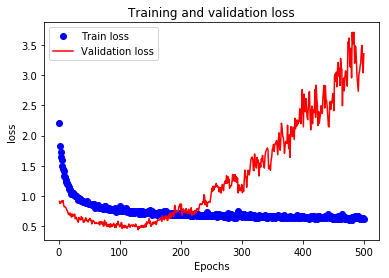

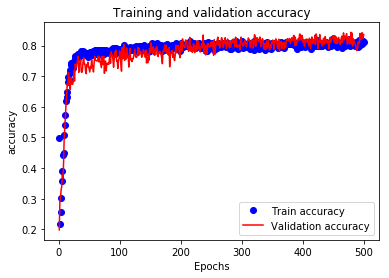

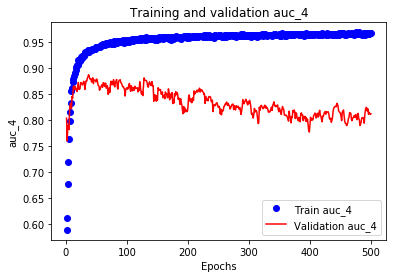

Prediction performance on 8000 observations from validation set using holdout
Confusion matrix: 
[[0.86995 0.13005]
 [0.03412 0.06222]]
AUC 0.808
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 70)                2520      
_________________________________________________________________
dropout_24 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 45)                3195      
_________________________________________________________________
dropout_25 (Dropout)         (None, 45)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 30)                1380      
_________________________________________________________________
dropout_26 (Dropout)         (None, 30) 

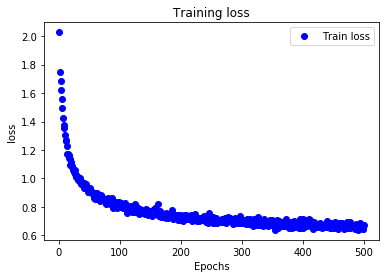

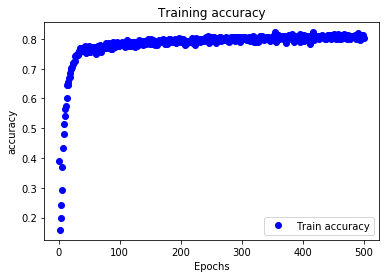

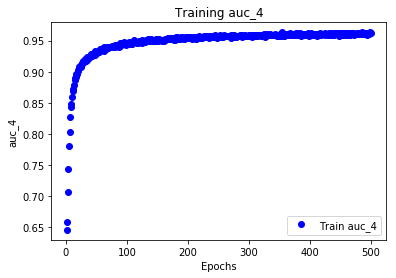

- Saving the model to ../data/models/test_mlp/...
Saving model to ../data/models/test_mlp/time_2018-02-20_p180_bg__sequential_6_190731_1656.h5
Prediction performance on 15540 observations from test set
Confusion matrix: 
[[0.85212 0.14788]
 [0.00052 0.00297]]
AUC 0.869
Confusion matrix:
[[13196  2290]
 [    8    46]]
Saving dictionary to ../data/viz_data/test_mlp/time_2018-02-20_p180_bg__sequential_6_190731_1656_viz.pkl


In [9]:
experiment = mlp_exp(datafolder, prefix, postfix, experiment_name='test_mlp', 
                     hidden_layers_no=4, hidden_nodes=[70, 45,30,15],
                     optimizer=Adam(0.001),
                     hl_activations=[tf.nn.relu]*4, dropout=[0.5]*4, 
                     loss_func = tf.keras.losses.BinaryCrossentropy(),
                     validation_size=8000,
                     metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
                     to_monitor=('accuracy', 0.9),
                     validation_mode='endpoint',
                     validation_ep=True,
                     epochs=500, 
                     batch_size=128,
                     use_batch_and_steps=False,
                     class_1_weight=25,
                     retrain_for_testing=True,
                     pred_threshold = 0.55,
                     early_stopping=True, 
                     save_model=True, 
                     save_results_for_viz=True,
                     mlf_tracking=False)